In [2]:
import numpy as np
import math

# TODO: complete the function
def softmax(L):
    """
    This function takes as input a list of numbers, and returns the list
    of values given by the softmax function.
    """
    # compute the exponential of each input number
    # compute the sum of these exponentials
    # compute the softmax values
    exp_numbers=[math.exp(i) for i in L]
    sum_exp=sum(exp_numbers)
    return [i/sum_exp for i in exp_numbers]



### Notebook grading
    
def correct_softmax(L):
    exp_L = np.exp(L)
    return list(np.divide(exp_L, exp_L.sum()))

L_test = [5,6,7]
solution = correct_softmax(L_test)
trial = softmax(L_test)

if len(trial) != len(solution):
    print("Hmm... there must be a mistake. Trying for L={}. The \
length of the correct result is {} but the list returned by your code \
is of length {}".format(
        L_test,
        len(solution),
        len(trial)
    ))
elif np.allclose(trial, solution):
    print("Correct!")
else:
    print("Hmm... there must be a mistake. Trying for L={}. The \
correct answer is {} and your code returned {}".format(
        L_test,
        solution,
        trial
    ))

Correct!


In [3]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Example data
# Features: [study_hours, sleep_hours]
X = np.array([[5, 7], [2, 6], [8, 8], [1, 2], [6, 9], [7, 8], [1, 3], [3, 4]])
# Labels: 1 = Pass, 0 = Fail
y = np.array([1, 0, 1, 0, 1, 1, 0, 0])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Predictions:", y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Predictions: [0 1]
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


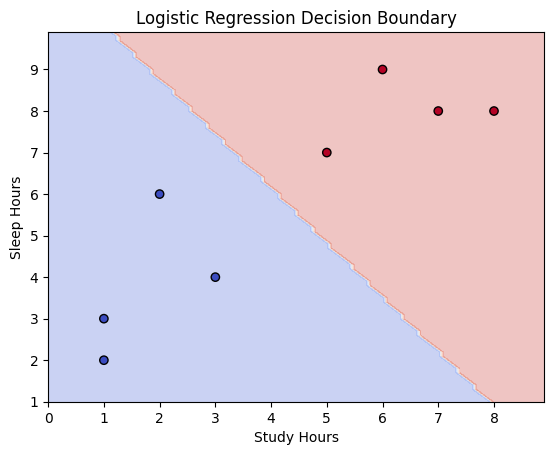

In [4]:
import matplotlib.pyplot as plt

# Define range for plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.title('Logistic Regression Decision Boundary')
plt.show()
